In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px


In [3]:
#import coverage to look at gray fox sample coverage
cvg = pd.read_csv('data/coverage-summary.tsv', sep = '\t')
cvg

,segment,0x,1-25x,25-100x,100-1000x,1000x+,sample_id,total_coverage
0,ha,0.0,0.0,0.0,7.0,1735.0,be_w1-replicate-1,1742.0
1,m,0.0,982.0,0.0,0.0,0.0,be_w1-replicate-1,982.0
2,na,0.0,0.0,0.0,977.0,445.0,be_w1-replicate-1,1422.0
3,np,0.0,0.0,26.0,1487.0,0.0,be_w1-replicate-1,1513.0
4,ns,0.0,0.0,0.0,13.0,837.0,be_w1-replicate-1,850.0
...,...,...,...,...,...,...,...,...
635,np,0.0,0.0,0.0,1498.0,15.0,wws_w1-replicate-2,1513.0
636,ns,0.0,0.0,0.0,0.0,850.0,wws_w1-replicate-2,850.0
637,pa,0.0,1.0,0.0,0.0,2189.0,wws_w1-replicate-2,2190.0
638,pb1,0.0,0.0,0.0,0.0,2299.0,wws_w1-replicate-2,2299.0


In [5]:
#subset to just gray foxes 
gf_cvg = cvg[cvg['sample_id'].str.contains('gf_', na=False)]
gf_cvg

,segment,0x,1-25x,25-100x,100-1000x,1000x+,sample_id,total_coverage
360,ha,0.0,0.0,0.0,0.0,1742.0,gf_w1-replicate-1,1742.0
361,m,0.0,0.0,83.0,899.0,0.0,gf_w1-replicate-1,982.0
362,na,0.0,0.0,0.0,0.0,1422.0,gf_w1-replicate-1,1422.0
363,np,0.0,0.0,0.0,39.0,1474.0,gf_w1-replicate-1,1513.0
364,ns,0.0,0.0,0.0,23.0,827.0,gf_w1-replicate-1,850.0
365,pa,0.0,0.0,0.0,0.0,2190.0,gf_w1-replicate-1,2190.0
366,pb1,0.0,0.0,0.0,0.0,2299.0,gf_w1-replicate-1,2299.0
367,pb2,0.0,0.0,0.0,117.0,2181.0,gf_w1-replicate-1,2298.0
368,ha,0.0,0.0,0.0,0.0,1742.0,gf_w1-replicate-2,1742.0
369,m,0.0,0.0,43.0,939.0,0.0,gf_w1-replicate-2,982.0


##reminder that for within host analysis, we need a coverage of >=100 for both replicates##
##gf_w3 does not have sufficient coverage in one half of PB2 for within host analysis
##gf_w2 has 38nt in PB2 with insufficient coverage for withinhost

In [7]:
##read in repshared variants file, and then will also filter to gray fox only 
vars_repshared = pd.read_csv('output_dfs/2025_03_13_repshared_SNVs_allsamples.tsv', sep = '\t')
vars_repshared.head(5)

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,...,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq,freq_bin,order_domstat
0,HA,914,G,A,Ala300Ala,synonymous,1.5%,0.0150,replicate-2,be_w1,...,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_synonymous,0.0126,<3%,acciptriformes_wild
1,PA,398,A,G,Glu133Gly,nonsynonymous,12.26%,0.1226,replicate-2,be_w1,...,shared,wild,26.95,acciptriformes,Crawford,2022-09-28,wild_nonsynonymous,0.1905,10-20%,acciptriformes_wild
2,HA,1151,C,T,Tyr379Tyr,synonymous,2.82%,0.0282,replicate-2,be_w3,...,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.0390,3-10%,acciptriformes_wild
3,HA,1580,A,G,Lys522Lys,synonymous,4.35%,0.0435,replicate-2,be_w3,...,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_synonymous,0.0317,3-10%,acciptriformes_wild
4,NaN,285,A,G,Ile94Val,nonsynonymous,41.98%,0.4198,replicate-2,be_w3,...,shared,wild,27.07,acciptriformes,Mehoopany,2024-02-02,wild_nonsynonymous,0.3693,30-40%,acciptriformes_wild


In [29]:
gf_SNVs = vars_repshared[vars_repshared['sample_ID'].str.contains('gf_', na=False)]
gf_SNVs = gf_SNVs.dropna(subset=['gene'])
gf_SNVs

,gene,reference_position,reference_allele,variant_allele,coding_region_change,synonymous/nonsynonymous,frequency(%),frequency,replicate,sample_ID,...,rep_shared,domestic_status,ct_value,order,county,date,color,avg_freq,freq_bin,order_domstat
563,HA,905,C,A,Pro297Pro,synonymous,7.58%,0.0758,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_synonymous,0.07975,3-10%,carnivora_wild
564,HA,955,C,A,Thr314Asn,nonsynonymous,47.35%,0.4735,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_nonsynonymous,0.47660,40-50%,carnivora_wild
566,NP,849,G,A,Leu276Leu,synonymous,4.75%,0.0475,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_synonymous,0.05110,3-10%,carnivora_wild
567,NP,1243,G,A,Val408Ile,nonsynonymous,49.78%,0.4978,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_nonsynonymous,0.48550,40-50%,carnivora_wild
568,NP,1361,T,C,Met447Thr,nonsynonymous,47.29%,0.4729,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_nonsynonymous,0.47995,40-50%,carnivora_wild
569,PB1,644,A,G,Lys215Arg,nonsynonymous,4.45%,0.0445,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_nonsynonymous,0.03880,3-10%,carnivora_wild
570,PB1,1884,G,T,Leu628Leu,synonymous,8.75%,0.0875,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_synonymous,0.08935,3-10%,carnivora_wild
571,PB1,2261,G,A,Arg754Lys,nonsynonymous,18.68%,0.1868,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_nonsynonymous,0.17790,10-20%,carnivora_wild
572,PB2,455,A,C,His151Pro,nonsynonymous,5.14%,0.0514,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_nonsynonymous,0.05260,3-10%,carnivora_wild
573,PB2,1255,C,T,Leu418Leu,synonymous,8.93%,0.0893,replicate-2,gf_w1,...,shared,wild,12.91,carnivora,Unknown,2023-04-02,wild_synonymous,0.09045,3-10%,carnivora_wild


/var/folders/8h/zkgpnzwj7f9d82wldp_d4h_w0000gs/T/ipykernel_11712/4196388570.py:73: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


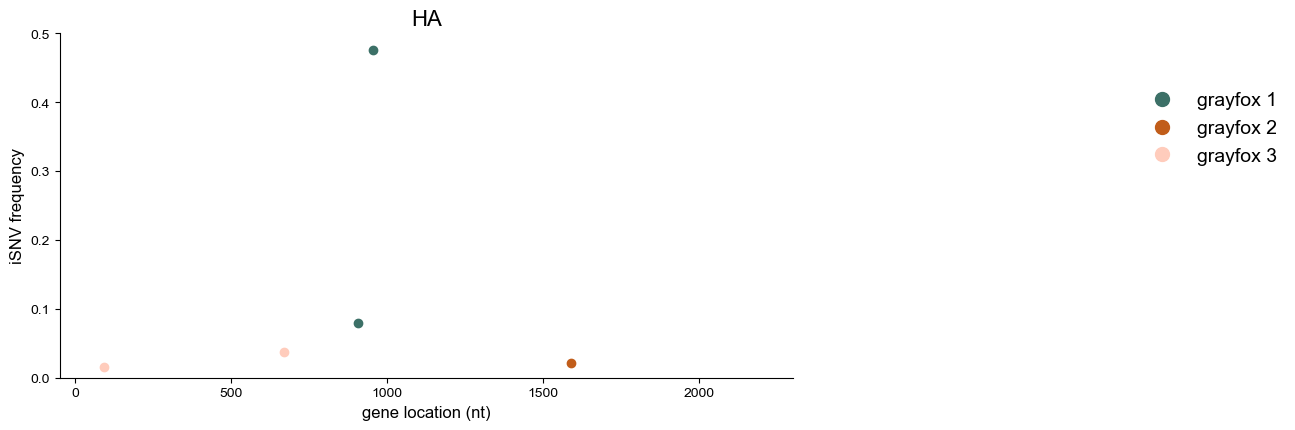

In [30]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
from matplotlib import gridspec


# pb2 = shared_vars_dedupe[shared_vars_dedupe["gene"] == "PB2"]
# w_syn_pb2 = pb2[pb2["color"] == "wild_synonymous"]
# w_nonsyn_pb2 = pb2[pb2["color"] == "wild_nonsynonymous"]
# c_syn_pb2 = pb2[pb2["color"] == "commercial_synonymous"]
# c_nonsyn_pb2 = pb2[pb2["color"] == "commercial_nonsynonymous"]


##define subset dfs by gene and category
HA = gf_SNVs[gf_SNVs["gene"] == "HA"]
gf1 = HA[HA["sample_ID"] == "gf_w1"]
gf2 = HA[HA["sample_ID"] == "gf_w2"]
gf3 = HA[HA["sample_ID"] == "gf_w3"]

gf1_clr = '#3C7067'
gf2_clr = '#C15D1A'
gf3_clr = '#FFCCBC'

# HA['sample_ID'] = HA['sample_ID'].map(color_map)

# Create figure
fig = plt.figure(figsize=(10, 8), facecolor='w')
plt.style.use('default')
mpl.rc('font', family='Arial')
gs = gridspec.GridSpec(2, 10)

ax1 = fig.add_subplot(gs[0, 0:8])  # PB2

# Set plot style
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(True)
ax1.spines['left'].set_visible(True)
ax1.tick_params(axis='both', which='major', labelsize=10)
ax1.tick_params(axis='both', which='minor', labelsize=10)

# Set axis labels and title
ax1.set_title('HA', fontname='Arial', fontsize=16)
ax1.set_facecolor('white')
ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
ax1.set_xlabel('gene location (nt)', fontname='Arial', fontsize=12)

# Set axis limits and ticks
ax1.set_ylim(0, 0.5)
ax1.set_xlim(-50, 2300)
ax1.set_xticks([0, 500, 1000, 1500, 2000])


ax1.scatter(x=gf1['reference_position'], y=gf1['avg_freq'], marker='o', facecolors=gf1_clr, edgecolors=gf1_clr)
ax1.scatter(x=gf2['reference_position'], y=gf2['avg_freq'], marker='o', facecolors=gf2_clr, edgecolors=gf2_clr)
ax1.scatter(x=gf3['reference_position'], y=gf3['avg_freq'], marker='o', facecolors=gf3_clr, edgecolors=gf3_clr)
# ax1.scatter(x=c_nonsyn_pb2['reference_position'], y=c_nonsyn_pb2['avg_freq'], marker='^', facecolors=comm_clr, edgecolors=comm_clr)


# add a legend to this plot
gf_1 = mlines.Line2D([], [], marker='o', markerfacecolor=gf1_clr, markeredgecolor=gf1_clr, linestyle='None', markersize=10, label='grayfox 1')
gf_2 = mlines.Line2D([], [], marker='o', markerfacecolor=gf2_clr, markeredgecolor=gf2_clr, linestyle='None', markersize=10, label='grayfox 2')
gf_3 = mlines.Line2D([], [], marker='o', markerfacecolor=gf3_clr, markeredgecolor=gf3_clr, linestyle='None', markersize=10, label='grayfox 3')
# c_nonsyn = mlines.Line2D([], [], marker='^', markerfacecolor=comm_clr, markeredgecolor=comm_clr, linestyle='None', markersize=10, label='commercial, nonsynonymous iSNVs')

# Add the legend to the figure
fig.legend(handles=[gf_1, gf_2, gf_3], frameon=False, fontsize=14, bbox_to_anchor=(1.3,0.9))



# Adjust layout and show plot
fig.tight_layout()
fig.show()

# Save plot
# fig.savefig("../figures/iSNVs_by_gene/PB2.pdf", bbox_inches='tight', dpi=300)


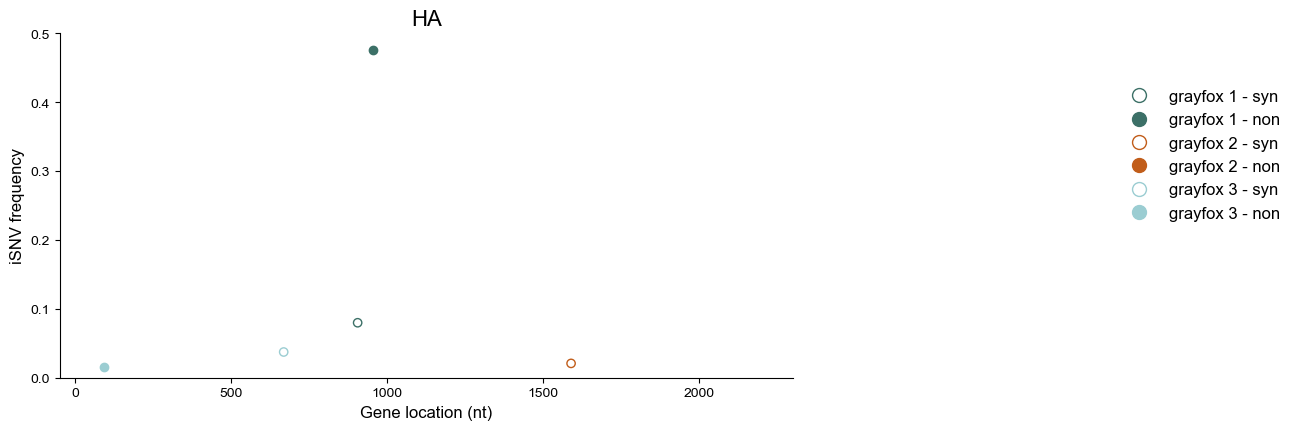

In [31]:
# import matplotlib.pyplot as plt
# import matplotlib.lines as mlines
# import matplotlib as mpl
# from matplotlib import gridspec

# # Define subset DataFrames by gene and category
# HA = gf_SNVs[gf_SNVs["gene"] == "HA"]
# gf1 = HA[HA["sample_ID"] == "gf_w1"]
# gf2 = HA[HA["sample_ID"] == "gf_w2"]
# gf3 = HA[HA["sample_ID"] == "gf_w3"]

# # Define colors for each sample
# gf1_clr = '#3C7067'
# gf2_clr = '#C15D1A'
# gf3_clr = '#9BCDD2'

# # Create figure
# fig = plt.figure(figsize=(10, 8), facecolor='w')
# plt.style.use('default')
# mpl.rc('font', family='Arial')
# gs = gridspec.GridSpec(2, 10)

# ax1 = fig.add_subplot(gs[0, 0:8])  # Plot for HA

# # Set plot style
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.tick_params(axis='both', which='major', labelsize=10)

# # Set axis labels and title
# ax1.set_title('HA', fontname='Arial', fontsize=16)
# ax1.set_facecolor('white')
# ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
# ax1.set_xlabel('Gene location (nt)', fontname='Arial', fontsize=12)

# # Set axis limits and ticks
# ax1.set_ylim(0, 0.5)
# ax1.set_xlim(-50, 2300)
# ax1.set_xticks([0, 500, 1000, 1500, 2000])

# # Plot data for each sample with 'o' markers, open for synonymous and filled for nonsynonymous
# for df, color in zip([gf1, gf2, gf3], [gf1_clr, gf2_clr, gf3_clr]):
#     for syn_non in ['synonymous', 'nonsynonymous']:
#         subset = df[df['synonymous/nonsynonymous'] == syn_non]
#         ax1.scatter(
#             x=subset['reference_position'],
#             y=subset['avg_freq'],
#             marker='o',
#             facecolors='none' if syn_non == 'synonymous' else color,  # Open for synonymous, filled for nonsynonymous
#             edgecolors=color,
#             label=f'{df["sample_ID"].iloc[0]} - {syn_non}'
#         )

# # Create legend handles
# gf_1_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf1_clr, linestyle='None', markersize=10, label='grayfox 1 - syn')
# gf_1_non = mlines.Line2D([], [], marker='o', markerfacecolor=gf1_clr, markeredgecolor=gf1_clr, linestyle='None', markersize=10, label='grayfox 1 - non')
# gf_2_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf2_clr, linestyle='None', markersize=10, label='grayfox 2 - syn')
# gf_2_non = mlines.Line2D([], [], marker='o', markerfacecolor=gf2_clr, markeredgecolor=gf2_clr, linestyle='None', markersize=10, label='grayfox 2 - non')
# gf_3_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf3_clr, linestyle='None', markersize=10, label='grayfox 3 - syn')
# gf_3_non = mlines.Line2D([], [], marker='o', markerfacecolor=gf3_clr, markeredgecolor=gf3_clr, linestyle='None', markersize=10, label='grayfox 3 - non')

# # Add the legend to the figure
# fig.legend(handles=[gf_1_syn, gf_1_non, gf_2_syn, gf_2_non, gf_3_syn, gf_3_non],
#            frameon=False, fontsize=12, bbox_to_anchor=(1.3, 0.9))

# # Adjust layout and show plot
# fig.tight_layout()
# plt.show()


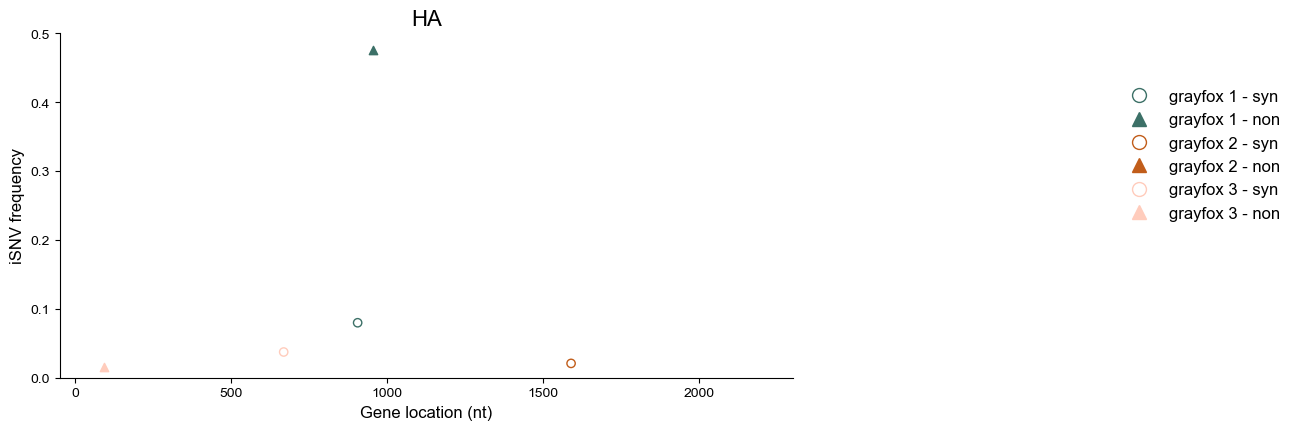

In [32]:
# import matplotlib.pyplot as plt
# import matplotlib.lines as mlines
# import matplotlib as mpl
# from matplotlib import gridspec

# # Define subset DataFrames by gene and category
# HA = gf_SNVs[gf_SNVs["gene"] == "HA"]
# gf1 = HA[HA["sample_ID"] == "gf_w1"]
# gf2 = HA[HA["sample_ID"] == "gf_w2"]
# gf3 = HA[HA["sample_ID"] == "gf_w3"]

# # Define colors for each sample
# gf1_clr = '#3C7067'
# gf2_clr = '#C15D1A'
# gf3_clr = '#FFCCBC'

# # Define marker shape mapping for 'syn_non'
# marker_map = {
#     'synonymous': 'o',       # Circle for synonymous
#     'nonsynonymous': '^'     # Triangle for nonsynonymous
# }

# # Create figure
# fig = plt.figure(figsize=(10, 8), facecolor='w')
# plt.style.use('default')
# mpl.rc('font', family='Arial')
# gs = gridspec.GridSpec(2, 10)

# ax1 = fig.add_subplot(gs[0, 0:8])  # Plot for HA

# # Set plot style
# ax1.spines['top'].set_visible(False)
# ax1.spines['right'].set_visible(False)
# ax1.tick_params(axis='both', which='major', labelsize=10)

# # Set axis labels and title
# ax1.set_title('HA', fontname='Arial', fontsize=16)
# ax1.set_facecolor('white')
# ax1.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
# ax1.set_xlabel('Gene location (nt)', fontname='Arial', fontsize=12)

# # Set axis limits and ticks
# ax1.set_ylim(0, 0.5)
# ax1.set_xlim(-50, 2300)
# ax1.set_xticks([0, 500, 1000, 1500, 2000])

# # Plot data for each sample with marker shape based on 'syn_non'
# for df, color in zip([gf1, gf2, gf3], [gf1_clr, gf2_clr, gf3_clr]):
#     for syn_non, marker in marker_map.items():
#         subset = df[df['synonymous/nonsynonymous'] == syn_non]
#         ax1.scatter(
#             x=subset['reference_position'],
#             y=subset['avg_freq'],
#             marker=marker,
#             facecolors='none' if syn_non == 'synonymous' else color,  # Hollow for synonymous
#             edgecolors=color,
#             label=f'{df["sample_ID"].iloc[0]} - {syn_non}'
#         )

# # Create legend handles
# gf_1_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf1_clr, linestyle='None', markersize=10, label='grayfox 1 - syn')
# gf_1_non = mlines.Line2D([], [], marker='^', markerfacecolor=gf1_clr, markeredgecolor=gf1_clr, linestyle='None', markersize=10, label='grayfox 1 - non')
# gf_2_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf2_clr, linestyle='None', markersize=10, label='grayfox 2 - syn')
# gf_2_non = mlines.Line2D([], [], marker='^', markerfacecolor=gf2_clr, markeredgecolor=gf2_clr, linestyle='None', markersize=10, label='grayfox 2 - non')
# gf_3_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf3_clr, linestyle='None', markersize=10, label='grayfox 3 - syn')
# gf_3_non = mlines.Line2D([], [], marker='^', markerfacecolor=gf3_clr, markeredgecolor=gf3_clr, linestyle='None', markersize=10, label='grayfox 3 - non')

# # Add the legend to the figure
# fig.legend(handles=[gf_1_syn, gf_1_non, gf_2_syn, gf_2_non, gf_3_syn, gf_3_non],
#            frameon=False, fontsize=12, bbox_to_anchor=(1.3, 0.9))

# # Adjust layout and show plot
# fig.tight_layout()
# plt.show()


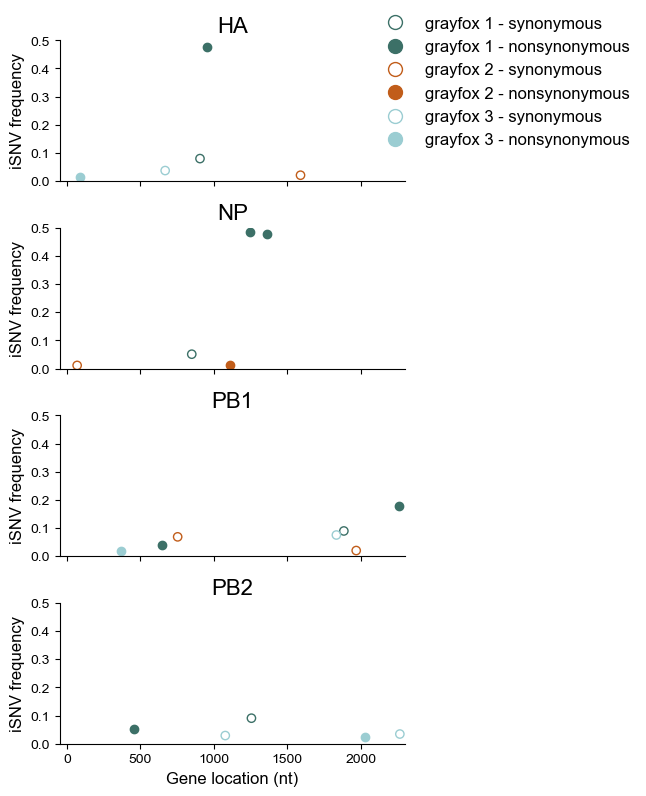

In [36]:
# ##to adapt to other plots with more than 4 genes

# import matplotlib.pyplot as plt
# import matplotlib.lines as mlines
# import matplotlib as mpl
# import pandas as pd

# # Define colors for each sample
# gf1_clr = '#3C7067'
# gf2_clr = '#C15D1A'
# gf3_clr = '#9BCDD2'

# # List of colors mapped to each sample
# sample_colors = {
#     'gf_w1': gf1_clr,
#     'gf_w2': gf2_clr,
#     'gf_w3': gf3_clr
# }

# # Get unique gene names
# unique_genes = gf_SNVs['gene'].unique()

# # Create a figure with multiple panels (subplots)
# n_genes = len(unique_genes)
# fig, axes = plt.subplots(nrows=n_genes, ncols=1, figsize=(5, 2 * n_genes), facecolor='w', sharex=True)

# # If only 1 gene, make axes iterable
# if n_genes == 1:
#     axes = [axes]

# # Loop through each gene and create a panel
# for i, gene in enumerate(unique_genes):
#     ax = axes[i]
#     gene_df = gf_SNVs[gf_SNVs['gene'] == gene]  # Subset for the gene

#     # Set plot style
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.tick_params(axis='both', which='major', labelsize=10)

#     # Set axis labels and title
#     ax.set_title(f'{gene}', fontname='Arial', fontsize=16)
#     ax.set_facecolor('white')
#     ax.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)
#     if i == n_genes - 1:  # Only add x-label to the last plot
#         ax.set_xlabel('Gene location (nt)', fontname='Arial', fontsize=12)

#     # Set axis limits and ticks
#     ax.set_ylim(0, 0.5)
#     ax.set_xlim(-50, 2300)
#     ax.set_xticks([0, 500, 1000, 1500, 2000])

#     # Plot data for each sample with different colors, hollow for synonymous and filled for nonsynonymous
#     for sample_ID, color in sample_colors.items():
#         sample_df = gene_df[gene_df['sample_ID'] == sample_ID]
#         for syn_non in ['synonymous', 'nonsynonymous']:
#             subset = sample_df[sample_df['synonymous/nonsynonymous'] == syn_non]
#             ax.scatter(
#                 x=subset['reference_position'],
#                 y=subset['avg_freq'],
#                 marker='o',
#                 facecolors='none' if syn_non == 'synonymous' else color,
#                 edgecolors=color,
#                 label=f'{sample_ID.replace("gf_w", "grayfox ")} - {syn_non}'
#             )

# # Create legend handles for all samples and types
# gf_1_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf1_clr, linestyle='None', markersize=10, label='grayfox 1 - synonymous')
# gf_1_non = mlines.Line2D([], [], marker='o', markerfacecolor=gf1_clr, markeredgecolor=gf1_clr, linestyle='None', markersize=10, label='grayfox 1 - nonsynonymous')
# gf_2_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf2_clr, linestyle='None', markersize=10, label='grayfox 2 - synonymous')
# gf_2_non = mlines.Line2D([], [], marker='o', markerfacecolor=gf2_clr, markeredgecolor=gf2_clr, linestyle='None', markersize=10, label='grayfox 2 - nonsynonymous')
# gf_3_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf3_clr, linestyle='None', markersize=10, label='grayfox 3 - synonymous')
# gf_3_non = mlines.Line2D([], [], marker='o', markerfacecolor=gf3_clr, markeredgecolor=gf3_clr, linestyle='None', markersize=10, label='grayfox 3 - nonsynonymous')

# # Add the legend to the figure with all sample labels
# fig.legend(
#     handles=[gf_1_syn, gf_1_non, gf_2_syn, gf_2_non, gf_3_syn, gf_3_non],
#     frameon=False,
#     fontsize=12,
#     loc='upper right',
#     bbox_to_anchor=(1.3, 1)
# )

# # Adjust layout and show plot
# fig.tight_layout(rect=[0, 0, 0.85, 1])
# plt.show()


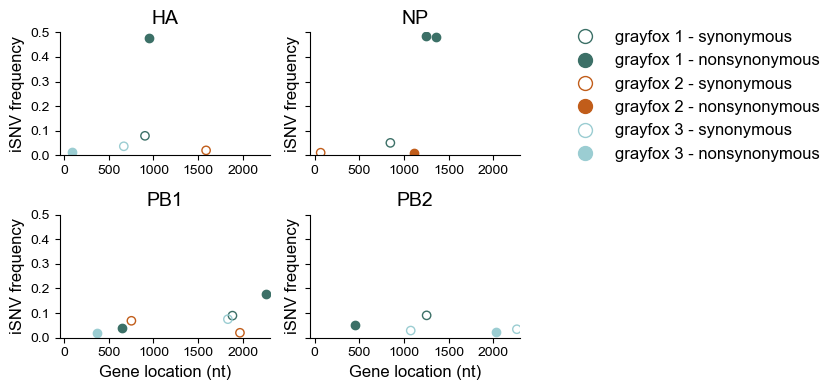

In [54]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib as mpl
import pandas as pd
import numpy as np

# Define colors for each sample
gf1_clr = '#3C7067'
gf2_clr = '#C15D1A'
gf3_clr = '#9BCDD2'

# List of colors mapped to each sample
sample_colors = {
    'gf_w1': gf1_clr,
    'gf_w2': gf2_clr,
    'gf_w3': gf3_clr
}

# Get unique gene names
unique_genes = gf_SNVs['gene'].dropna().unique()

# Create a 2x2 grid for 4 genes
n_genes = len(unique_genes)
n_rows, n_cols = 2, 2  # 2 rows and 2 columns
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6, 4), facecolor='w', sharex=True, sharey=True)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through each gene and create a panel
for i, gene in enumerate(unique_genes):
    ax = axes[i]
    gene_df = gf_SNVs[gf_SNVs['gene'] == gene]  # Subset for the gene

    # Set plot style
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', which='major', labelsize=10)

    # Set axis labels and title
    ax.set_title(f'{gene}', fontname='Arial', fontsize=14)
    ax.set_facecolor('white')
    
    # Add y-axis labels to all panels
    ax.set_ylabel('iSNV frequency', fontname='Arial', fontsize=12)

    # Add x-axis labels only to the bottom row
    if i >= 2:
        ax.set_xlabel('Gene location (nt)', fontname='Arial', fontsize=12)

    # Set axis limits and ticks
    ax.set_ylim(0, 0.5)
    ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
    ax.set_xlim(-50, 2300)
    ax.set_xticks([0, 500, 1000, 1500, 2000])

    # Ensure tick labels are shown on all panels
    ax.tick_params(axis='x', labelbottom=True)


    # Plot data for each sample with different colors, hollow for synonymous and filled for nonsynonymous
    for sample_ID, color in sample_colors.items():
        sample_df = gene_df[gene_df['sample_ID'] == sample_ID]
        for syn_non in ['synonymous', 'nonsynonymous']:
            subset = sample_df[sample_df['synonymous/nonsynonymous'] == syn_non]
            ax.scatter(
                x=subset['reference_position'],
                y=subset['avg_freq'],
                marker='o',
                facecolors='none' if syn_non == 'synonymous' else color,
                edgecolors=color,
                label=f'{sample_ID.replace("gf_w", "grayfox ")} - {syn_non}'
            )

# Hide any unused subplots if fewer than 4 genes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Create legend handles for all samples and types
gf_1_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf1_clr, linestyle='None', markersize=10, label='grayfox 1 - synonymous')
gf_1_non = mlines.Line2D([], [], marker='o', markerfacecolor=gf1_clr, markeredgecolor=gf1_clr, linestyle='None', markersize=10, label='grayfox 1 - nonsynonymous')
gf_2_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf2_clr, linestyle='None', markersize=10, label='grayfox 2 - synonymous')
gf_2_non = mlines.Line2D([], [], marker='o', markerfacecolor=gf2_clr, markeredgecolor=gf2_clr, linestyle='None', markersize=10, label='grayfox 2 - nonsynonymous')
gf_3_syn = mlines.Line2D([], [], marker='o', markerfacecolor='none', markeredgecolor=gf3_clr, linestyle='None', markersize=10, label='grayfox 3 - synonymous')
gf_3_non = mlines.Line2D([], [], marker='o', markerfacecolor=gf3_clr, markeredgecolor=gf3_clr, linestyle='None', markersize=10, label='grayfox 3 - nonsynonymous')

# Add a single legend outside the grid
fig.legend(
    handles=[gf_1_syn, gf_1_non, gf_2_syn, gf_2_non, gf_3_syn, gf_3_non],
    frameon=False,
    fontsize=12,
    loc='upper right',
    bbox_to_anchor=(1.4, 0.95)
)

# Adjust layout to prevent overlap
fig.tight_layout(rect=[0, 0, 0.9, 1])  # Add space for legend
plt.show()

fig.savefig("output_figs/2025_03_27_GF_SNVs_bygene.pdf", bbox_inches='tight', dpi=300)


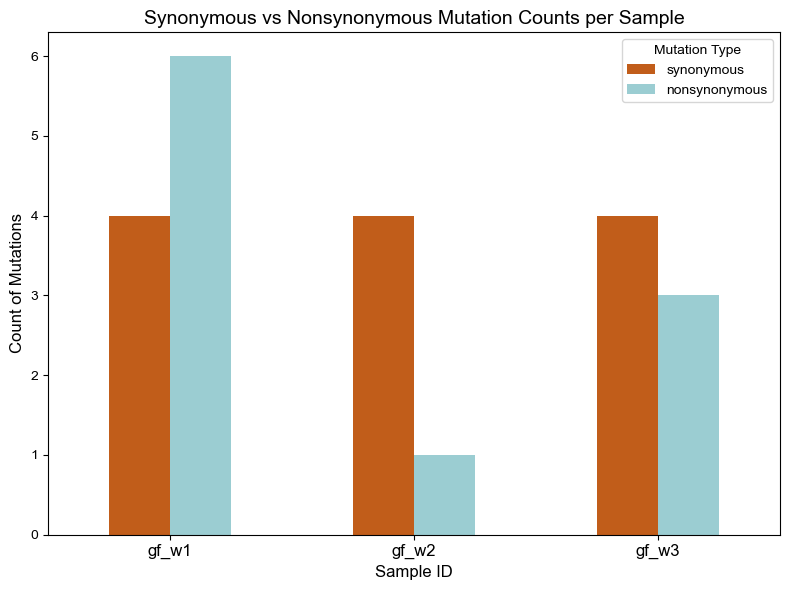

In [67]:
count_df = gf_SNVs.groupby(['sample_ID', 'synonymous/nonsynonymous']).size().reset_index(name='count')

# Pivot the data so that syn/non becomes columns
pivot_df = count_df.pivot(index='sample_ID', columns='synonymous/nonsynonymous', values='count').fillna(0)

# Optional: Fill missing columns if any
pivot_df = pivot_df.reindex(columns=['synonymous', 'nonsynonymous'], fill_value=0)

# Plot bar graph
pivot_df.plot(kind='bar', stacked=False, figsize=(8, 6), color=['#C15D1A', '#9BCDD2'])

# Add labels and title
plt.ylabel('Count of Mutations', fontsize=12)
plt.xlabel('Sample ID', fontsize=12)
plt.title('Synonymous vs Nonsynonymous Mutation Counts per Sample', fontsize=14)
plt.legend(title='Mutation Type')
plt.xticks(fontsize=12, rotation=0)

plt.savefig("output_figs/2025_03_27_GF_syn_nonsyn_counts.pdf", bbox_inches='tight', dpi=300)


# Show plot
plt.tight_layout()
plt.show()

In [70]:
gf_nonsyn = gf_SNVs[gf_SNVs['synonymous/nonsynonymous'] =='nonsynonymous']
print(gf_nonsyn)

    gene  reference_position reference_allele variant_allele  \
564   HA                 955                C              A   
567   NP                1243                G              A   
568   NP                1361                T              C   
569  PB1                 644                A              G   
571  PB1                2261                G              A   
572  PB2                 455                A              C   
577   NP                1109                T              C   
580   HA                  91                A              C   
582  PB1                 367                A              G   
585  PB2                2030                C              T   

    coding_region_change synonymous/nonsynonymous frequency(%)  frequency  \
564            Thr314Asn            nonsynonymous       47.35%     0.4735   
567            Val408Ile            nonsynonymous       49.78%     0.4978   
568            Met447Thr            nonsynonymous       47.29%  